In [1]:
%load_ext autoreload

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
reco_A = "DeepSC_AlgoA"
reco_B = "DeepSC_AlgoB"
reco_C = "DeepSC_AlgoC"
reco_D = "DeepSC_AlgoD"

input_folder = "/eos/user/v/vdurupt/reco_comparison_corrected/supercluster_regression/photons"
output_folder = "/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/Comparison_4DeepSC"

In [4]:
df_1_A = pd.HDFStore(f"{input_folder}/pho_UL18_123X_{reco_A}_object.h5py", "r")["df"]
df_1_B = pd.HDFStore(f"{input_folder}/pho_UL18_123X_{reco_B}_object.h5py", "r")["df"]
df_1_C = pd.HDFStore(f"{input_folder}/pho_UL18_123X_{reco_C}_object.h5py", "r")["df"]
df_1_D = pd.HDFStore(f"{input_folder}/pho_UL18_123X_{reco_D}_object.h5py", "r")["df"]
df_2 = pd.HDFStore(f"{input_folder}/pho_UL18_123X_Mustache_object.h5py", "r")["df"]

df_1_A.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_B.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_C.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_1_D.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_2.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
# df_1.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)
# df_2.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)

df_1_A = df_1_A.iloc[:-1]
df_1_B = df_1_B.iloc[:-1]
df_1_C = df_1_C.iloc[:-1]
df_1_D = df_1_D.iloc[:-1]
df_2 = df_2.iloc[:-1]

# df_join = df_1.merge(df_2, on=["runId","eventId","caloindex"], suffixes=["_old", "_new"],indicator=True)

In [5]:
df_1_A.loc[df_1_A.sc_matched==True, "has_sc"] = 1
df_1_B.loc[df_1_B.sc_matched==True, "has_sc"] = 1
df_1_C.loc[df_1_C.sc_matched==True, "has_sc"] = 1
df_1_D.loc[df_1_D.sc_matched==True, "has_sc"] = 1
df_2.loc[df_2.sc_matched==True, "has_sc"] = 1

df_1_A.loc[df_1_A.sc_matched==False, "has_sc"] = 0
df_1_B.loc[df_1_B.sc_matched==False, "has_sc"] = 0
df_1_C.loc[df_1_C.sc_matched==False, "has_sc"] = 0
df_1_D.loc[df_1_D.sc_matched==False, "has_sc"] = 0
df_2.loc[df_2.sc_matched==False, "has_sc"] = 0

# Gen-matching study

In [6]:
print(f"N. photon tot in EB (DeepSC_A): {df_1_A[df_1_A.pho_eta<1.566].shape[0]}")
print(f"N. photon tot in EB (DeepSC_B): {df_1_B[df_1_B.pho_eta<1.566].shape[0]}")
print(f"N. photon tot in EB (DeepSC_C): {df_1_C[df_1_C.pho_eta<1.566].shape[0]}")
print(f"N. photon tot in EB (DeepSC_D): {df_1_D[df_1_D.pho_eta<1.566].shape[0]}")
print(f"N. photon tot in EB (Mustache): {df_2[df_2.pho_eta<1.566].shape[0]}\n")

print(f"N. photon with matched SC in EB (DeepSC_A): {df_1_A[df_1_A.pho_eta<1.566].has_sc.sum()}")
print(f"N. photon with matched SC in EB (DeepSC_B): {df_1_B[df_1_B.pho_eta<1.566].has_sc.sum()}")
print(f"N. photon with matched SC in EB (DeepSC_C): {df_1_C[df_1_C.pho_eta<1.566].has_sc.sum()}")
print(f"N. photon with matched SC in EB (DeepSC_D): {df_1_D[df_1_D.pho_eta<1.566].has_sc.sum()}")
print(f"N. photon with matched SC in EB (Mustache): {df_2[df_2.pho_eta<1.566].has_sc.sum()}\n")

print(f"N. photon GenMatched in EB (DeepSC_A): {df_1_A[(df_1_A.pho_eta<1.566)&(df_1_A.has_sc==1)].genmatched.sum()}")
print(f"N. photon GenMatched in EB (DeepSC_B): {df_1_B[(df_1_B.pho_eta<1.566)&(df_1_B.has_sc==1)].genmatched.sum()}")
print(f"N. photon GenMatched in EB (DeepSC_C): {df_1_C[(df_1_C.pho_eta<1.566)&(df_1_C.has_sc==1)].genmatched.sum()}")
print(f"N. photon GenMatched in EB (DeepSC_D): {df_1_D[(df_1_D.pho_eta<1.566)&(df_1_D.has_sc==1)].genmatched.sum()}")
print(f"N. photon GenMatched in EB (Mustache): {df_2[(df_2.pho_eta<1.566)&(df_2.has_sc==1)].genmatched.sum()}")

N. photon tot in EB (DeepSC_A): 1371761
N. photon tot in EB (DeepSC_B): 1373221
N. photon tot in EB (DeepSC_C): 1372085
N. photon tot in EB (DeepSC_D): 1370771
N. photon tot in EB (Mustache): 1371165

N. photon with matched SC in EB (DeepSC_A): 1371761.0
N. photon with matched SC in EB (DeepSC_B): 1373221.0
N. photon with matched SC in EB (DeepSC_C): 1372085.0
N. photon with matched SC in EB (DeepSC_D): 1370771.0
N. photon with matched SC in EB (Mustache): 1371165.0

N. photon GenMatched in EB (DeepSC_A): 1319299.0
N. photon GenMatched in EB (DeepSC_B): 1319519.0
N. photon GenMatched in EB (DeepSC_C): 1319327.0
N. photon GenMatched in EB (DeepSC_D): 1319001.0
N. photon GenMatched in EB (Mustache): 1317397.0


In [7]:
print(f"N. photon tot in EE (DeepSC_A): {df_1_A[df_1_A.pho_eta>1.566].shape[0]}")
print(f"N. photon tot in EE (DeepSC_B): {df_1_B[df_1_B.pho_eta>1.566].shape[0]}")
print(f"N. photon tot in EE (DeepSC_C): {df_1_C[df_1_C.pho_eta>1.566].shape[0]}")
print(f"N. photon tot in EE (DeepSC_D): {df_1_D[df_1_D.pho_eta>1.566].shape[0]}")
print(f"N. photon tot in EE (Mustache): {df_2[df_2.pho_eta>1.566].shape[0]}\n")

print(f"N. photon with matched SC in EE (DeepSC_A): {df_1_A[df_1_A.pho_eta>1.566].has_sc.sum()}")
print(f"N. photon with matched SC in EE (DeepSC_B): {df_1_B[df_1_B.pho_eta>1.566].has_sc.sum()}")
print(f"N. photon with matched SC in EE (DeepSC_C): {df_1_C[df_1_C.pho_eta>1.566].has_sc.sum()}")
print(f"N. photon with matched SC in EE (DeepSC_D): {df_1_D[df_1_D.pho_eta>1.566].has_sc.sum()}")
print(f"N. photon with matched SC in EE (Mustache): {df_2[df_2.pho_eta>1.566].has_sc.sum()}\n")

print(f"N. photon GenMatched in EE (DeepSC_A): {df_1_A[(df_1_A.pho_eta>1.566)&(df_1_A.has_sc==1)].genmatched.sum()}")
print(f"N. photon GenMatched in EE (DeepSC_B): {df_1_B[(df_1_B.pho_eta>1.566)&(df_1_B.has_sc==1)].genmatched.sum()}")
print(f"N. photon GenMatched in EE (DeepSC_C): {df_1_C[(df_1_C.pho_eta>1.566)&(df_1_C.has_sc==1)].genmatched.sum()}")
print(f"N. photon GenMatched in EE (DeepSC_D): {df_1_D[(df_1_D.pho_eta>1.566)&(df_1_D.has_sc==1)].genmatched.sum()}")
print(f"N. photon GenMatched in EE (Mustache): {df_2[(df_2.pho_eta>1.566)&(df_2.has_sc==1)].genmatched.sum()}")

N. photon tot in EE (DeepSC_A): 418592
N. photon tot in EE (DeepSC_B): 419056
N. photon tot in EE (DeepSC_C): 419168
N. photon tot in EE (DeepSC_D): 418889
N. photon tot in EE (Mustache): 418256

N. photon with matched SC in EE (DeepSC_A): 418592.0
N. photon with matched SC in EE (DeepSC_B): 419056.0
N. photon with matched SC in EE (DeepSC_C): 419168.0
N. photon with matched SC in EE (DeepSC_D): 418889.0
N. photon with matched SC in EE (Mustache): 418256.0

N. photon GenMatched in EE (DeepSC_A): 398072.0
N. photon GenMatched in EE (DeepSC_B): 398033.0
N. photon GenMatched in EE (DeepSC_C): 398068.0
N. photon GenMatched in EE (DeepSC_D): 398094.0
N. photon GenMatched in EE (Mustache): 397677.0


# Plotting basic distribution to compare matched and not-matched electrons

In [8]:
df_1_A.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'pho_eta', 'pho_phi', 'pho_energy', 'pho_et', 'pho_scRawEnergy',
       'pho_e5x5', 'pho_e3x3', 'pho_sigmaIEtaIEta', 'pho_sigmaIEtaIPhi',
       'pho_sigmaIPhiIPhi', 'pho_hademCone', 'ncls_sel', 'ncls_sel_true',
       'ncls_sel_false', 'ncls_true', 'ncls_tot', 'ncls_missing', 'en_sc_raw',
       'et_sc_raw', 'en_sc_calib', 'et_sc_calib', 'calo_en_gen', 'calo_et_gen',
       'calo_en_sim', 'calo_et_sim', 'calo_geneta', 'calo_genphi',
       'calo_simeta', 'calo_simphi', 'calo_genpt', 'genpart_en', 'genpart_et',
       'gen_eta', 'gen_phi', 'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU',
       'eventId', 'runId', 'has_sc'],
      dtype='object')

In [9]:
df_1_B.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'pho_eta', 'pho_phi', 'pho_energy', 'pho_et', 'pho_scRawEnergy',
       'pho_e5x5', 'pho_e3x3', 'pho_sigmaIEtaIEta', 'pho_sigmaIEtaIPhi',
       'pho_sigmaIPhiIPhi', 'pho_hademCone', 'ncls_sel', 'ncls_sel_true',
       'ncls_sel_false', 'ncls_true', 'ncls_tot', 'ncls_missing', 'en_sc_raw',
       'et_sc_raw', 'en_sc_calib', 'et_sc_calib', 'calo_en_gen', 'calo_et_gen',
       'calo_en_sim', 'calo_et_sim', 'calo_geneta', 'calo_genphi',
       'calo_simeta', 'calo_simphi', 'calo_genpt', 'genpart_en', 'genpart_et',
       'gen_eta', 'gen_phi', 'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU',
       'eventId', 'runId', 'has_sc'],
      dtype='object')

In [10]:
df_1_C.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'pho_eta', 'pho_phi', 'pho_energy', 'pho_et', 'pho_scRawEnergy',
       'pho_e5x5', 'pho_e3x3', 'pho_sigmaIEtaIEta', 'pho_sigmaIEtaIPhi',
       'pho_sigmaIPhiIPhi', 'pho_hademCone', 'ncls_sel', 'ncls_sel_true',
       'ncls_sel_false', 'ncls_true', 'ncls_tot', 'ncls_missing', 'en_sc_raw',
       'et_sc_raw', 'en_sc_calib', 'et_sc_calib', 'calo_en_gen', 'calo_et_gen',
       'calo_en_sim', 'calo_et_sim', 'calo_geneta', 'calo_genphi',
       'calo_simeta', 'calo_simphi', 'calo_genpt', 'genpart_en', 'genpart_et',
       'gen_eta', 'gen_phi', 'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU',
       'eventId', 'runId', 'has_sc'],
      dtype='object')

In [11]:
df_1_D.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'pho_eta', 'pho_phi', 'pho_energy', 'pho_et', 'pho_scRawEnergy',
       'pho_e5x5', 'pho_e3x3', 'pho_sigmaIEtaIEta', 'pho_sigmaIEtaIPhi',
       'pho_sigmaIPhiIPhi', 'pho_hademCone', 'ncls_sel', 'ncls_sel_true',
       'ncls_sel_false', 'ncls_true', 'ncls_tot', 'ncls_missing', 'en_sc_raw',
       'et_sc_raw', 'en_sc_calib', 'et_sc_calib', 'calo_en_gen', 'calo_et_gen',
       'calo_en_sim', 'calo_et_sim', 'calo_geneta', 'calo_genphi',
       'calo_simeta', 'calo_simphi', 'calo_genpt', 'genpart_en', 'genpart_et',
       'gen_eta', 'gen_phi', 'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU',
       'eventId', 'runId', 'has_sc'],
      dtype='object')

# Resolution summary ratio plots 

In [12]:
output_folder_A = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_{reco_A}"
output_folder_B = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_{reco_B}"
output_folder_C = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_{reco_C}"
output_folder_D = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_{reco_D}"
panels_res_byEt = [
    
    {
        "file1": output_folder_A+'/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file2": output_folder_A+'/resolution_pho_SC_genmatched_byEt_cruijff_mustache.csv',
        "file3": output_folder_B+'/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file4": output_folder_C+'/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file5": output_folder_D+'/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
        "bins1":[10, 20, 30, 40, 50, 60, 70, 80, 90 ,100],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Photon (ECAL only)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}|$",
    }
]



In [13]:
file_test = panels_res_byEt[0]["file1"]
df_test = pd.read_csv(file_test)
df_test

,eta_bin,et_bin,m,sigmaL,sigmaR,alphaL,alphaR,m_err,sigmaL_err,sigmaR_err,alphaL_err,alphaR_err,A,A_err,N,xmin,xmax,sigma_avg,sigma_avg_err
0,0,0,0.999031,0.017397,0.016189,0.291834,0.203685,0.000283,0.000253,0.000222,0.002936,0.002627,860.136773,5.604144,65348.0,0.878250,1.119750,0.016793,0.000169
1,1,0,0.999287,0.023278,0.019384,0.389673,0.231514,0.000592,0.000583,0.000434,0.004607,0.003196,370.199780,4.163068,27675.0,0.818785,1.186215,0.021331,0.000363
2,2,0,1.001500,0.046720,0.031672,0.404381,0.274013,0.002772,0.003059,0.002098,0.014272,0.010638,52.564506,1.505805,4858.0,0.708885,1.289115,0.039196,0.001855
3,3,0,1.001392,0.071537,0.053533,0.229532,0.209148,0.001186,0.001470,0.001134,0.011061,0.007803,578.828406,3.406676,83266.0,0.791415,1.199585,0.062535,0.000928
4,0,1,0.999373,0.013713,0.012617,0.268607,0.168665,0.000216,0.000196,0.000171,0.003156,0.002870,843.936522,5.283858,66928.0,0.913075,1.084925,0.013165,0.000130
5,1,1,0.999730,0.020232,0.015690,0.346038,0.194807,0.000456,0.000451,0.000334,0.004408,0.003263,396.641226,4.084108,29684.0,0.857985,1.140015,0.017961,0.000281
6,2,1,1.001063,0.039289,0.024791,0.383049,0.213769,0.001989,0.001985,0.001529,0.008375,0.010663,89.071734,2.315984,5635.0,0.645465,1.345535,0.032040,0.001253
7,3,1,0.999389,0.052691,0.041871,0.249593,0.150799,0.000863,0.001068,0.000820,0.010705,0.007475,616.128128,3.487858,87932.0,0.842200,1.148800,0.047281,0.000673
8,0,2,1.000187,0.011889,0.010213,0.251339,0.153998,0.000178,0.000165,0.000140,0.003259,0.003014,831.323106,5.132446,66767.0,0.929630,1.068370,0.011051,0.000108
9,1,2,1.000357,0.016800,0.013117,0.324995,0.178665,0.000374,0.000368,0.000277,0.004480,0.003581,379.777699,3.808559,29792.0,0.888120,1.102880,0.014959,0.000230


In [14]:
bins2 = panels_res_byEt[0]["bins2"]
bins2

[0, 1, 1.4442, 1.566, 2.5]

In [15]:
#Il faut changer manuellement la taille de l'axe y
#Il faut choisir manuellement quels bin de eta on veut tracer (chaque gtaph est tracé par le code situé entre deux lignes en pointillés)
#Cette fonction permet de tracer les graphs du rapport de résolution en fonction de Et pour les 3 zones de l'ECAL : centre EB, bords EB, EE
#ylim est une liste de 3 tuples

def do_summary_plot(panels, ylim, name="res", output=None):
    # Préparation de la fenêtre des plots
    fig = plt.figure(figsize=(10,22), dpi=200)
    gs = fig.add_gridspec(3*len(panels), hspace=0.4, height_ratios=[1/(3*len(panels))]*(3*len(panels)))
    axs = gs.subplots()
    hep.cms.label(rlabel="14 TeV", llabel="Simulation Preliminary", loc=0, ax=axs[0]) 
    
    
    
    for iP, param in enumerate(panels):
        
        label_x_output = param["binCol1"]
        
        # res_X sont les variables contenant les données
        res_A = pd.read_csv(param["file1"], sep=",")
        res_B = pd.read_csv(param["file3"], sep=",")
        res_C = pd.read_csv(param["file4"], sep=",")
        res_D = pd.read_csv(param["file5"], sep=",")
        res_must = pd.read_csv(param["file2"], sep=",")
        
        
        x = []
        errx = []
        #bins1 est l'abscisse, bin2 est la position eta
        bins1 = param["bins1"]
        bins2 = param["bins2"]
    
    
        #On remplie l'abscisse x par bins1, l'erreur est la moitié du bin et x est le milieu du bin
        for i in range(len(bins1)-1):
            errx.append((bins1[i+1]- bins1[i])/2)
            x.append((bins1[i+1]+ bins1[i])/2)
            

        #Cette ligne à chaque fois que A == "exclude_x_bin" , on met le paramètre "sigma_avg" (C) à 0
        #Donc à chaque fois qu'un bin de x est exlucs, la valeur de sigma_avg est mise à 0 
        res_A.loc[res_A[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_B.loc[res_B[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_C.loc[res_C[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_D.loc[res_D[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0

        res_must.loc[res_must[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0     

#-------------------------------------------------------------------------------------------
#Graph de resolution dans eta in [0, 1]
#bin est la partie gauche de l'intervalle donc ici 0
#y_lim = (0.87, 1.05)

    ibin = 0
    bin = 0
    ax = axs[0]
    
    
    rd_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar"]]
    rd_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar"]]
    rd_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar"]]
    rd_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar"]]
    rm = res_must[res_must[param["binCol2"]]==ibin][param["yvar"]]
    
    
    var_A = rd_A/rm
    var_B = rd_B/rm
    var_C = rd_C/rm
    var_D = rd_D/rm

    if not param["yvar_err"]:
        ax.errorbar(x, var_A,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_A}",  )
        ax.errorbar(x, var_B,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_B}",  )
        ax.errorbar(x, var_C,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_C}",  )
        ax.errorbar(x, var_D,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_D}",  )
    
    else:
        deep_err_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar_err"]]

        must_err = res_must[res_must[param["binCol2"]]==ibin][param["yvar_err"]]
             
            
        err_ratio_A = np.sqrt( ((1/rm)**2) * deep_err_A**2 + ((rd_A/(rm**2))**2 )*must_err**2 )
        err_ratio_B = np.sqrt( ((1/rm)**2) * deep_err_B**2 + ((rd_B/(rm**2))**2 )*must_err**2 )
        err_ratio_C = np.sqrt( ((1/rm)**2) * deep_err_C**2 + ((rd_C/(rm**2))**2 )*must_err**2 )
        err_ratio_D = np.sqrt( ((1/rm)**2) * deep_err_D**2 + ((rd_D/(rm**2))**2 )*must_err**2 )
        
        
        ax.errorbar(x, var_A,xerr=errx, yerr=err_ratio_A, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_A}", )
        ax.errorbar(x, var_B,xerr=errx, yerr=err_ratio_B, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_B}", )
        ax.errorbar(x, var_C,xerr=errx, yerr=err_ratio_C, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_C}", )
        ax.errorbar(x, var_D,xerr=errx, yerr=err_ratio_D, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_D}", )

        
    ax.axhline(y = 1, linestyle = "dashed", linewidth = 0.5 ,color = 'black')
    ax.set_ylabel(param["ylabel"])
    ax.set_xlabel(param["xlabel"])
    ax.set_ylim(ylim[0])


    ax.grid(which="both",axis="y")

    ax.legend(title= f"eta in [{bins2[ibin]}, {bins2[ibin + 1]}]", title_fontsize=17, fontsize=17, ncol=3, loc='upper center')

    ax.text(0.5, 0.1, param["general_label"], transform=ax.transAxes, fontsize=18)

    
    
#-------------------------------------------------------------------------------------------
#Graph de resolution dans eta in [1, 1.4442]
#bin est la partie gauche de l'intervalle donc ici 1
#y_lim = (0.8, 1.05)

    ibin = 1
    bin = 1
    ax = axs[1]
    
    
    rd_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar"]]
    rd_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar"]]
    rd_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar"]]
    rd_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar"]]
    rm = res_must[res_must[param["binCol2"]]==ibin][param["yvar"]]
    
    
    var_A = rd_A/rm
    var_B = rd_B/rm
    var_C = rd_C/rm
    var_D = rd_D/rm

    if not param["yvar_err"]:
        ax.errorbar(x, var_A,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_A}",  )
        ax.errorbar(x, var_B,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_B}",  )
        ax.errorbar(x, var_C,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_C}",  )
        ax.errorbar(x, var_D,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_D}",  )
    
    else:
        deep_err_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar_err"]]

        must_err = res_must[res_must[param["binCol2"]]==ibin][param["yvar_err"]]
             
            
        err_ratio_A = np.sqrt( ((1/rm)**2) * deep_err_A**2 + ((rd_A/(rm**2))**2 )*must_err**2 )
        err_ratio_B = np.sqrt( ((1/rm)**2) * deep_err_B**2 + ((rd_B/(rm**2))**2 )*must_err**2 )
        err_ratio_C = np.sqrt( ((1/rm)**2) * deep_err_C**2 + ((rd_C/(rm**2))**2 )*must_err**2 )
        err_ratio_D = np.sqrt( ((1/rm)**2) * deep_err_D**2 + ((rd_D/(rm**2))**2 )*must_err**2 )
        
        
        ax.errorbar(x, var_A,xerr=errx, yerr=err_ratio_A, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_A}", )
        ax.errorbar(x, var_B,xerr=errx, yerr=err_ratio_B, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_B}", )
        ax.errorbar(x, var_C,xerr=errx, yerr=err_ratio_C, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_C}", )
        ax.errorbar(x, var_D,xerr=errx, yerr=err_ratio_D, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_D}", )

    ax.axhline(y = 1, linestyle = "dashed", linewidth = 0.5 ,color = 'black')
    ax.set_ylabel(param["ylabel"])
    ax.set_xlabel(param["xlabel"])
    ax.set_ylim(ylim[1])


    ax.grid(which="both",axis="y")

    ax.legend(title= f"eta in [{bins2[ibin]}, {bins2[ibin + 1]}]", title_fontsize=17, fontsize=17, ncol=3, loc='upper center')

    ax.text(0.5, 0.1, param["general_label"], transform=ax.transAxes, fontsize=18)

#-------------------------------------------------------------------------------------------
#Graph de resolution dans eta in [1.566, 2.5]
#bin est la partie gauche de l'intervalle donc ici 1.566
#y_lim = (0.95, 1.05)

    ibin = 3
    bin = 1.566
    ax = axs[2]
    
    
    rd_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar"]]
    rd_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar"]]
    rd_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar"]]
    rd_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar"]]
    rm = res_must[res_must[param["binCol2"]]==ibin][param["yvar"]]
    
    
    var_A = rd_A/rm
    var_B = rd_B/rm
    var_C = rd_C/rm
    var_D = rd_D/rm

    if not param["yvar_err"]:
        ax.errorbar(x, var_A,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_A}",  )
        ax.errorbar(x, var_B,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_B}",  )
        ax.errorbar(x, var_C,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_C}",  )
        ax.errorbar(x, var_D,xerr=errx, fmt=".", linestyle='none', elinewidth=0, label=f"{reco_D}",  )
    
    else:
        deep_err_A = res_A[res_A[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_B = res_B[res_B[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_C = res_C[res_C[param["binCol2"]]==ibin][param["yvar_err"]]
        deep_err_D = res_D[res_D[param["binCol2"]]==ibin][param["yvar_err"]]

        must_err = res_must[res_must[param["binCol2"]]==ibin][param["yvar_err"]]
             
            
        err_ratio_A = np.sqrt( ((1/rm)**2) * deep_err_A**2 + ((rd_A/(rm**2))**2 )*must_err**2 )
        err_ratio_B = np.sqrt( ((1/rm)**2) * deep_err_B**2 + ((rd_B/(rm**2))**2 )*must_err**2 )
        err_ratio_C = np.sqrt( ((1/rm)**2) * deep_err_C**2 + ((rd_C/(rm**2))**2 )*must_err**2 )
        err_ratio_D = np.sqrt( ((1/rm)**2) * deep_err_D**2 + ((rd_D/(rm**2))**2 )*must_err**2 )
        
        
        ax.errorbar(x, var_A,xerr=errx, yerr=err_ratio_A, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_A}", )
        ax.errorbar(x, var_B,xerr=errx, yerr=err_ratio_B, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_B}", )
        ax.errorbar(x, var_C,xerr=errx, yerr=err_ratio_C, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_C}", )
        ax.errorbar(x, var_D,xerr=errx, yerr=err_ratio_D, fmt=".", linestyle='none', elinewidth=1, label=f"{reco_D}", )

    ax.axhline(y = 1, linestyle = "dashed", linewidth = 0.5 ,color = 'black')
    ax.set_ylabel(param["ylabel"])
    ax.set_xlabel(param["xlabel"])
    ax.set_ylim(ylim[2])

    ax.grid(which="both",axis="y")

    ax.legend(title= f"eta in [{bins2[ibin]}, {bins2[ibin + 1]}]", title_fontsize=17, fontsize=17, ncol=3, loc='upper center')

    ax.text(0.5, 0.1, param["general_label"], transform=ax.transAxes, fontsize=18)

    if output:
        os.makedirs(output, exist_ok=True)
        fig.savefig(output + f"/summary_by_{label_x_output}_{name}_ratio.png")
        fig.savefig(output + f"/summary_by_{label_x_output}_{name}_ratio.pdf")
        fig.savefig(output + f"/summary_by_{label_x_output}_{name}_ratio.svg")

In [16]:
bins2[:-1]

[0, 1, 1.4442, 1.566]

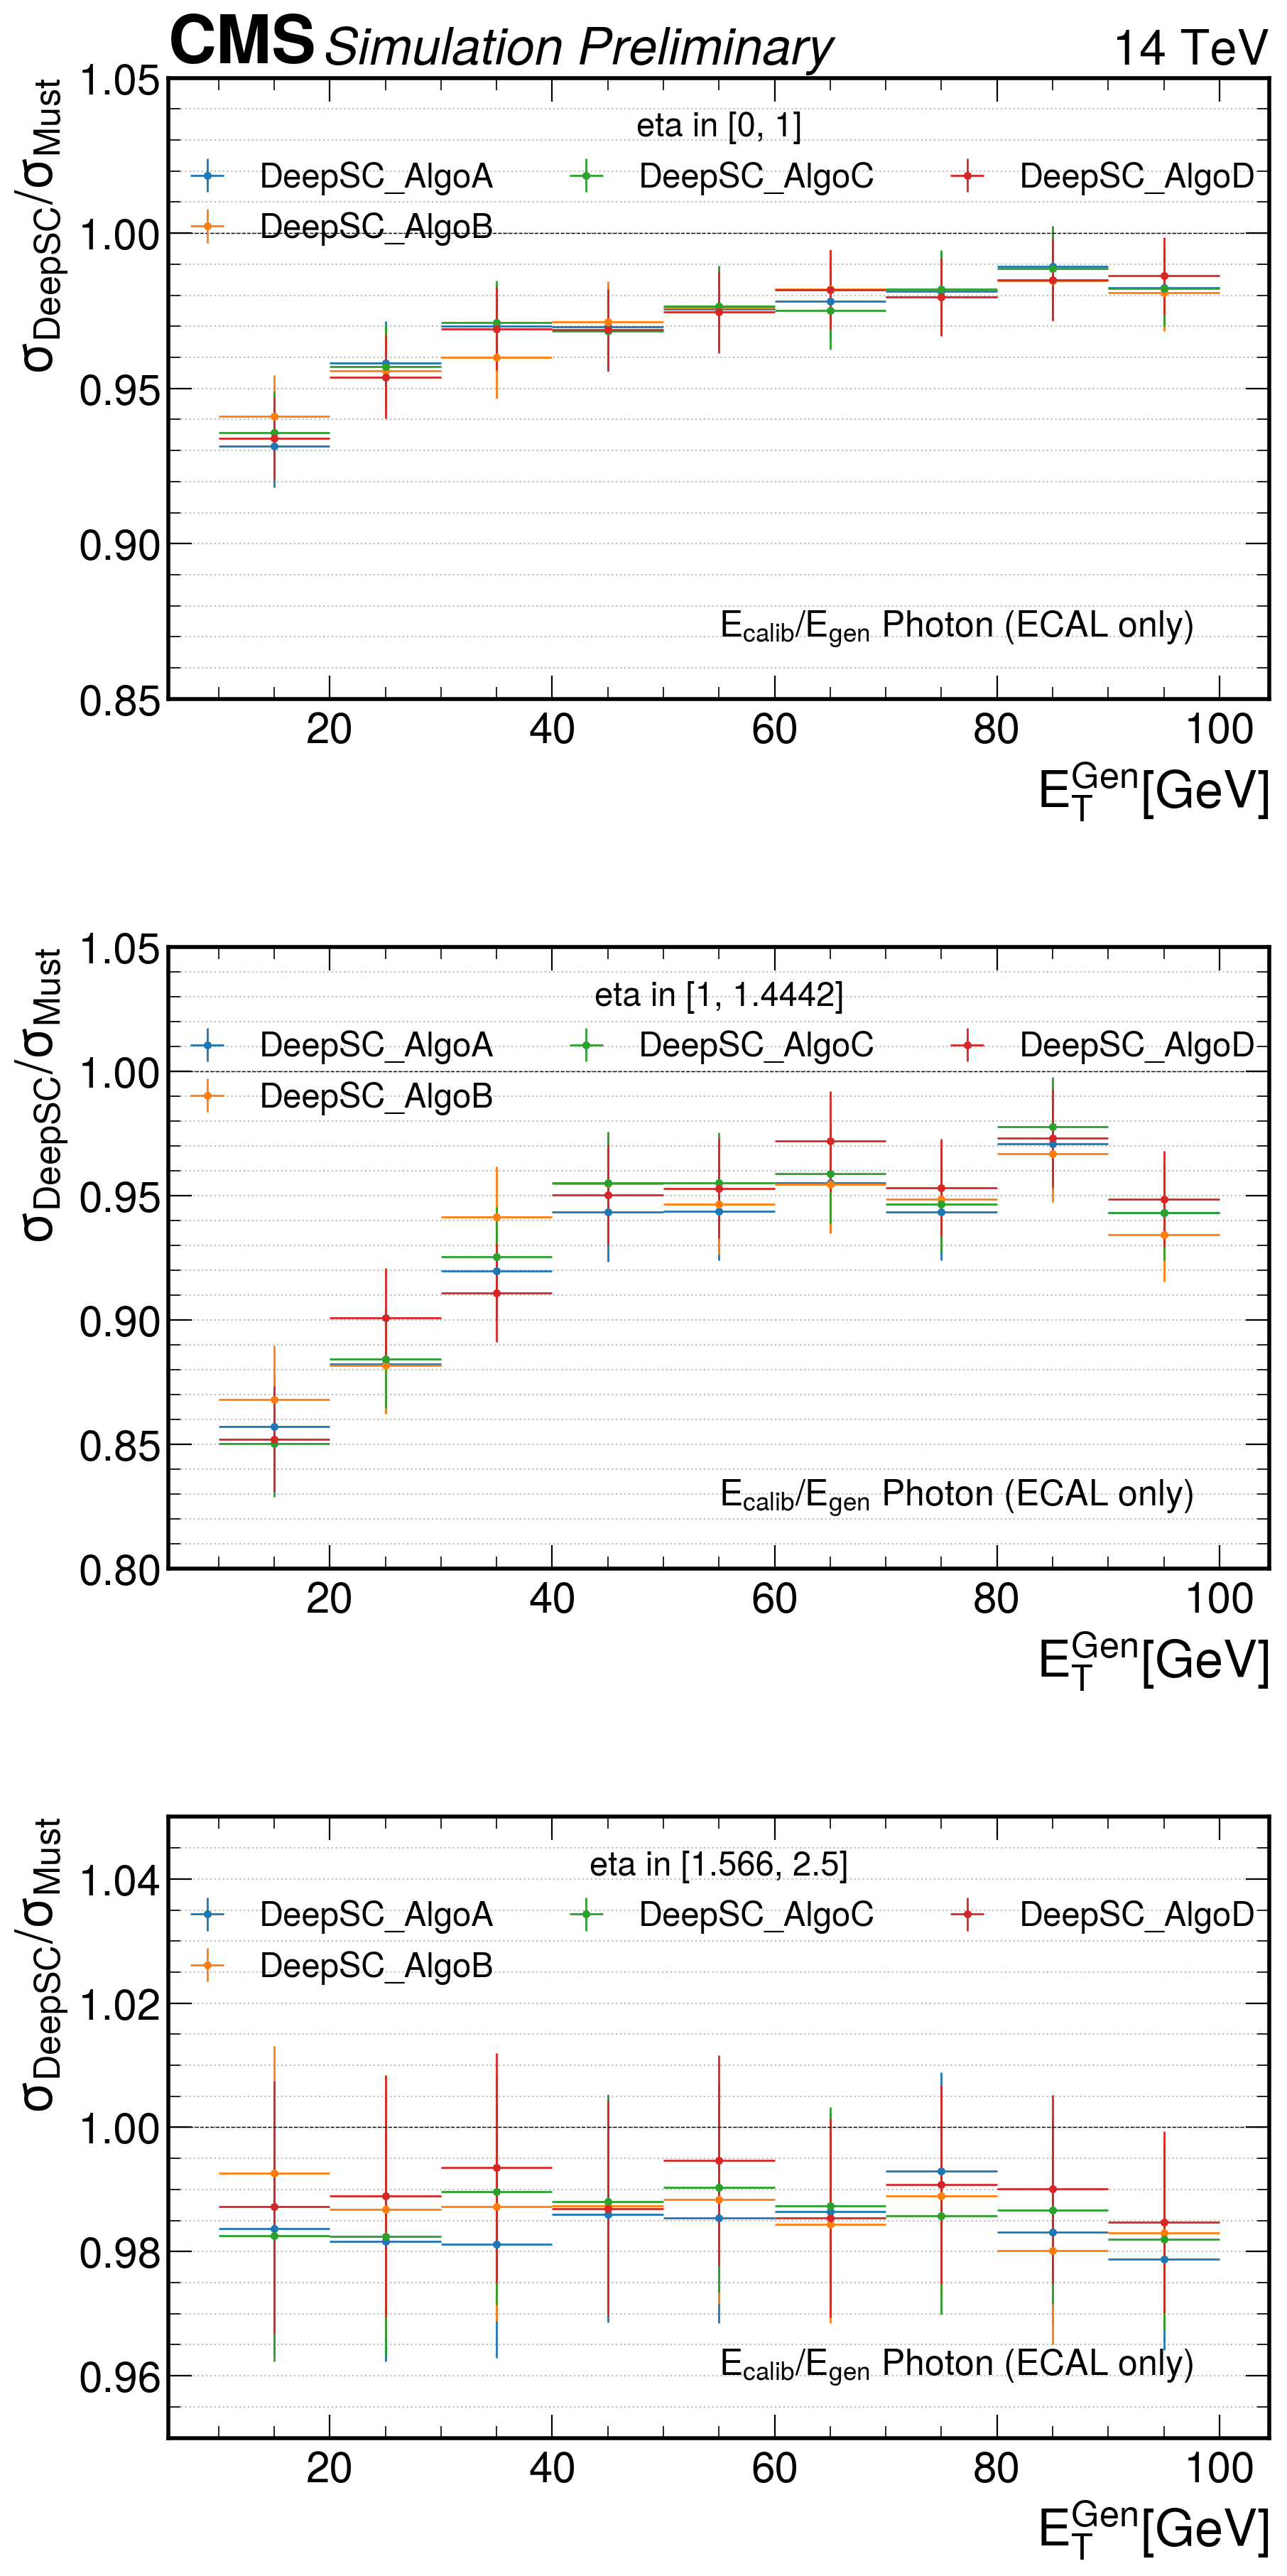

In [17]:
#Attention, les échelles ne sont pas les mêmes pour les 3 graphs
do_summary_plot(panels_res_byEt, [(0.85, 1.05), (0.8, 1.05), (0.95, 1.05)], output=output_folder)

In [18]:
panels_res_byPU = [
         {
        "file1": output_folder_A+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
        "file2": output_folder_A+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_mustache.csv',
        "file3": output_folder_B+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
        "file4": output_folder_C+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
        "file5": output_folder_D+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
        "bins1":[50,55,60,65,70,75],
        "bins2":[0, 1, 1.4442, 1.566, 2.5], 
        #"bins2": eta_range,
        "binCol1": "pu_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Photon (ECAL only)", 
        "xlabel":"$PU$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}|$",
    },
    
]

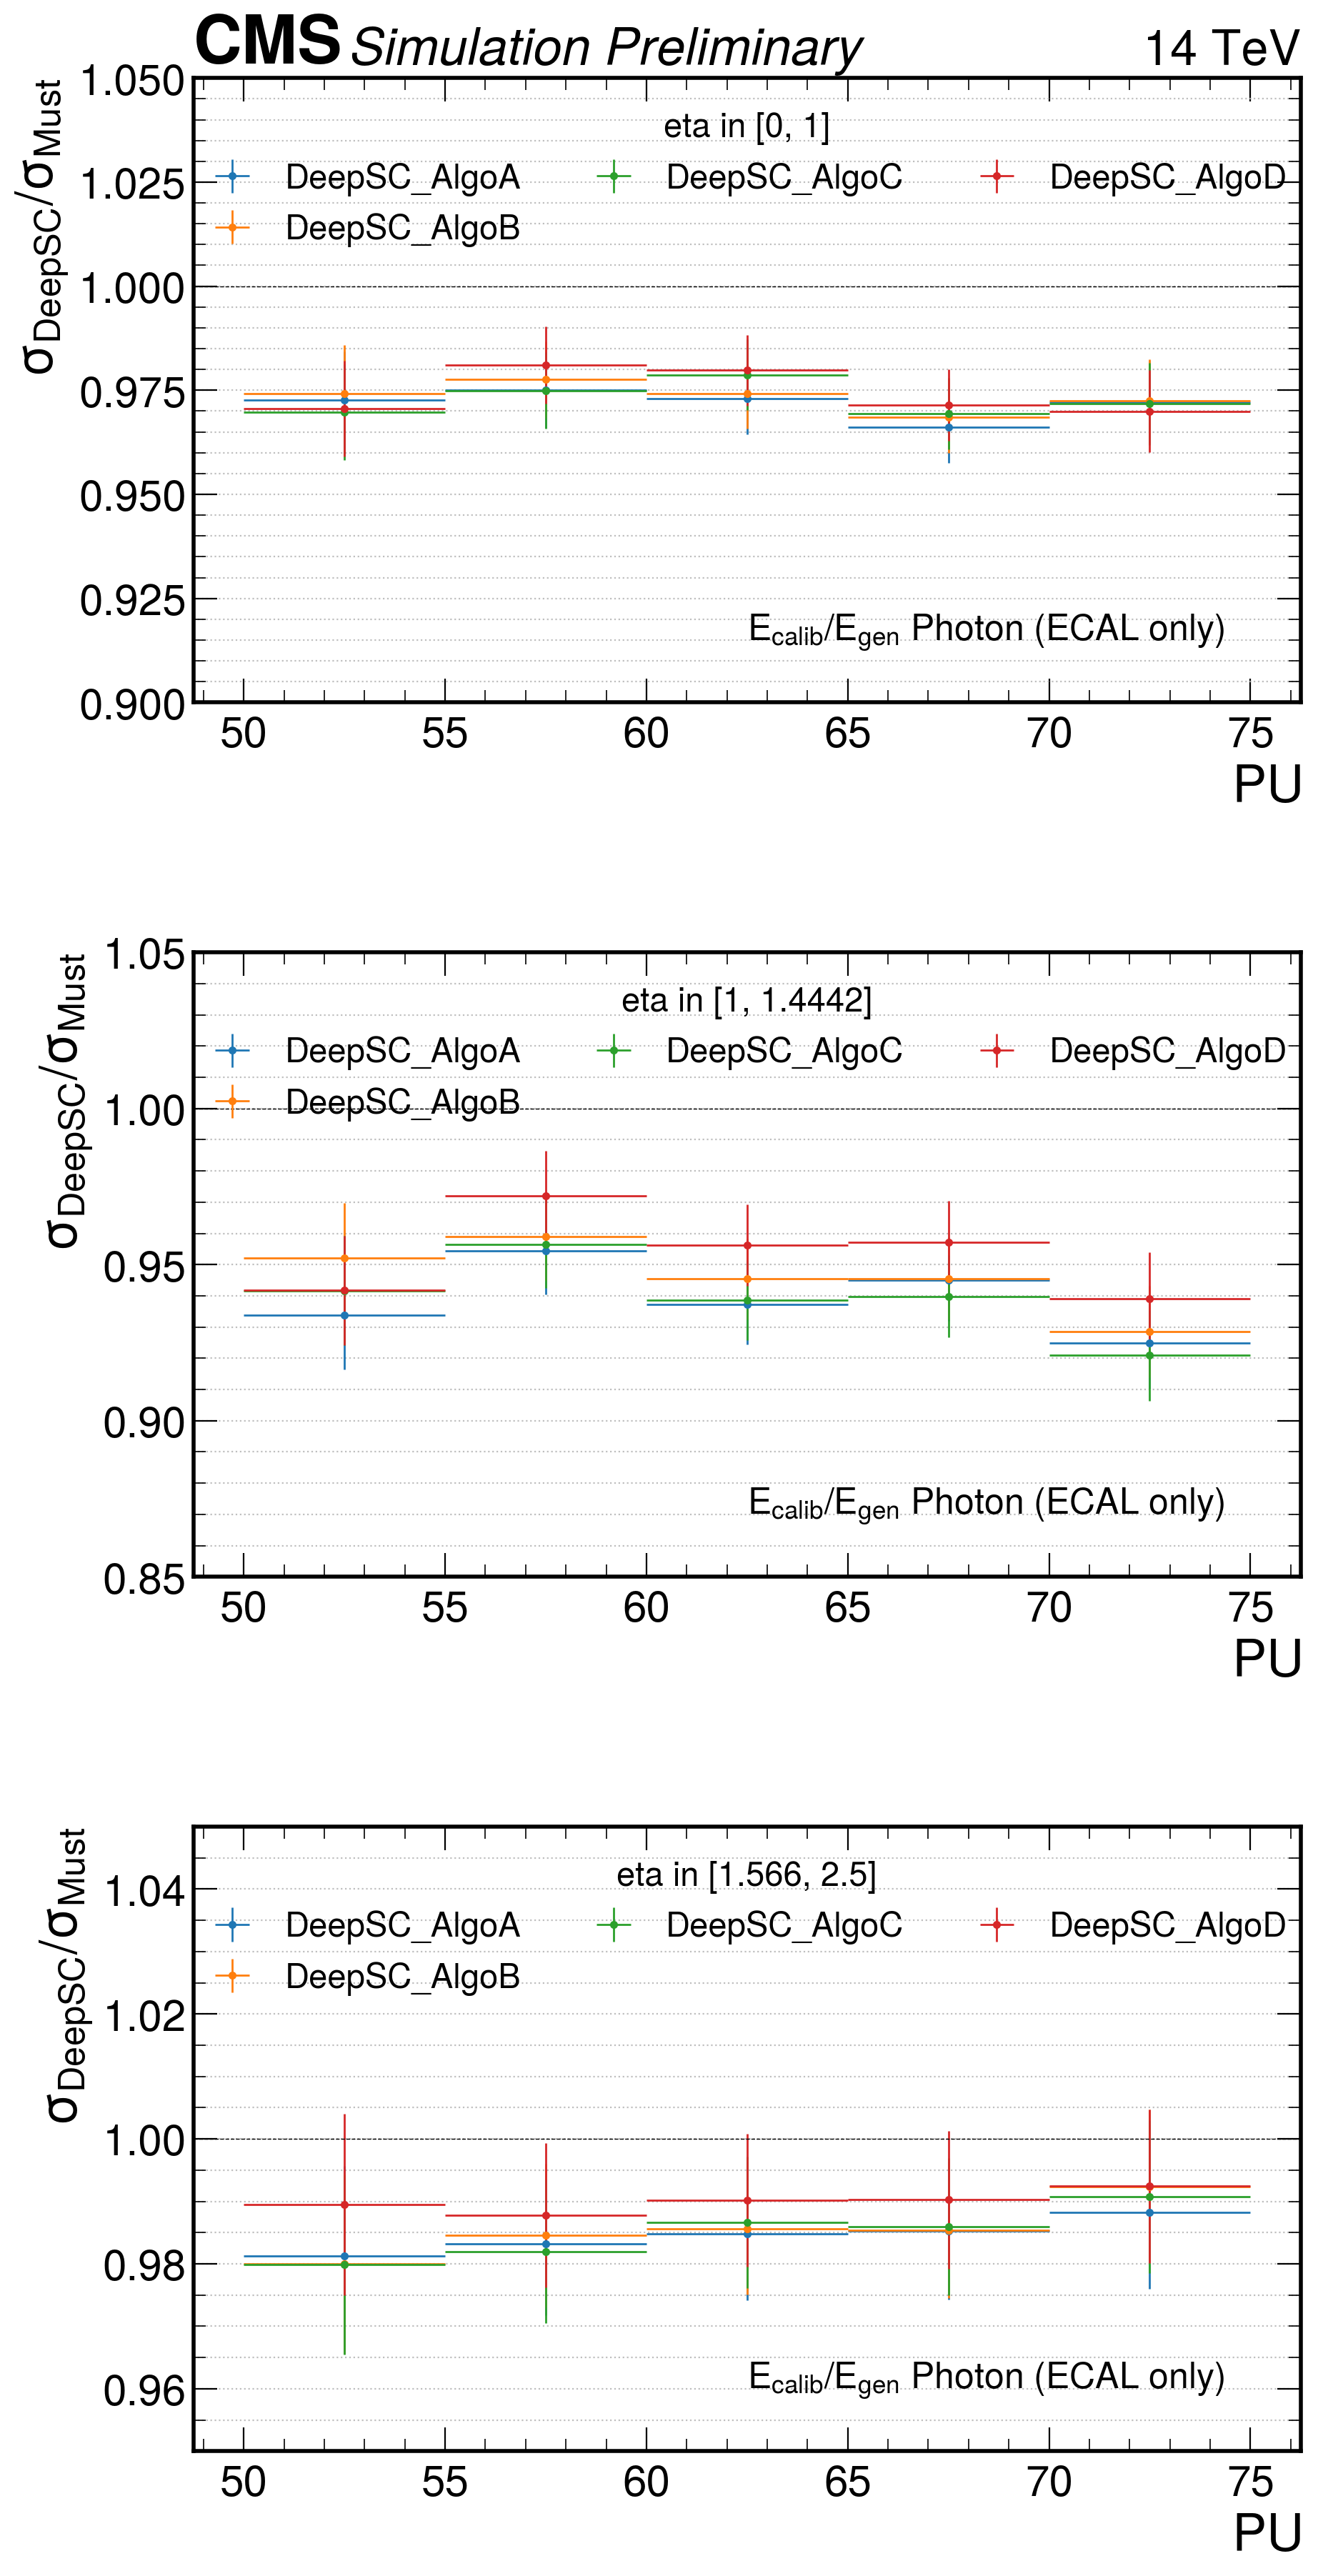

In [19]:
#Attention, les échelles ne sont pas les mêmes pour les 3 graphs
do_summary_plot(panels_res_byPU, [(0.9, 1.05), (0.85, 1.05), (0.95, 1.05)], output=output_folder)

# Bias summary plots

In [20]:
output_folder_A = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_{reco_A}"
output_folder_B = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_{reco_B}"
output_folder_C = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_{reco_C}"
output_folder_D = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_{reco_D}"

panels_res_byEt = [
    
    {
        "file1": output_folder_A+'/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file2": output_folder_A+'/resolution_pho_SC_genmatched_byEt_cruijff_mustache.csv',
        "file3": output_folder_B+'/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file4": output_folder_C+'/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file5": output_folder_D+'/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
        "bins1":[10, 20, 30, 40, 50, 60, 70, 80, 90 ,100],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],
        #"bins2": eta_range,
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Photon (ECAL only)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}|$",
    }
]

In [21]:
panels_bias_byEt = panels_res_byEt[:]
for p in panels_bias_byEt :
    p['yvar'] = "m"
    p['yvar_err'] = "m_err"
    p["ylabel"] ="$\mu_{DeepSC}/\mu_{Must}$"
    
panels_bias_byEt[0]["fill_between_y"] = [0.9, 1.05]
panels_bias_byEt

[{'file1': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoA/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
  'file2': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoA/resolution_pho_SC_genmatched_byEt_cruijff_mustache.csv',
  'file3': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoB/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
  'file4': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoC/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
  'file5': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoD/resolution_pho_SC_genmatched_byEt_cruijff_deepsc.csv',
  'bins1': [1

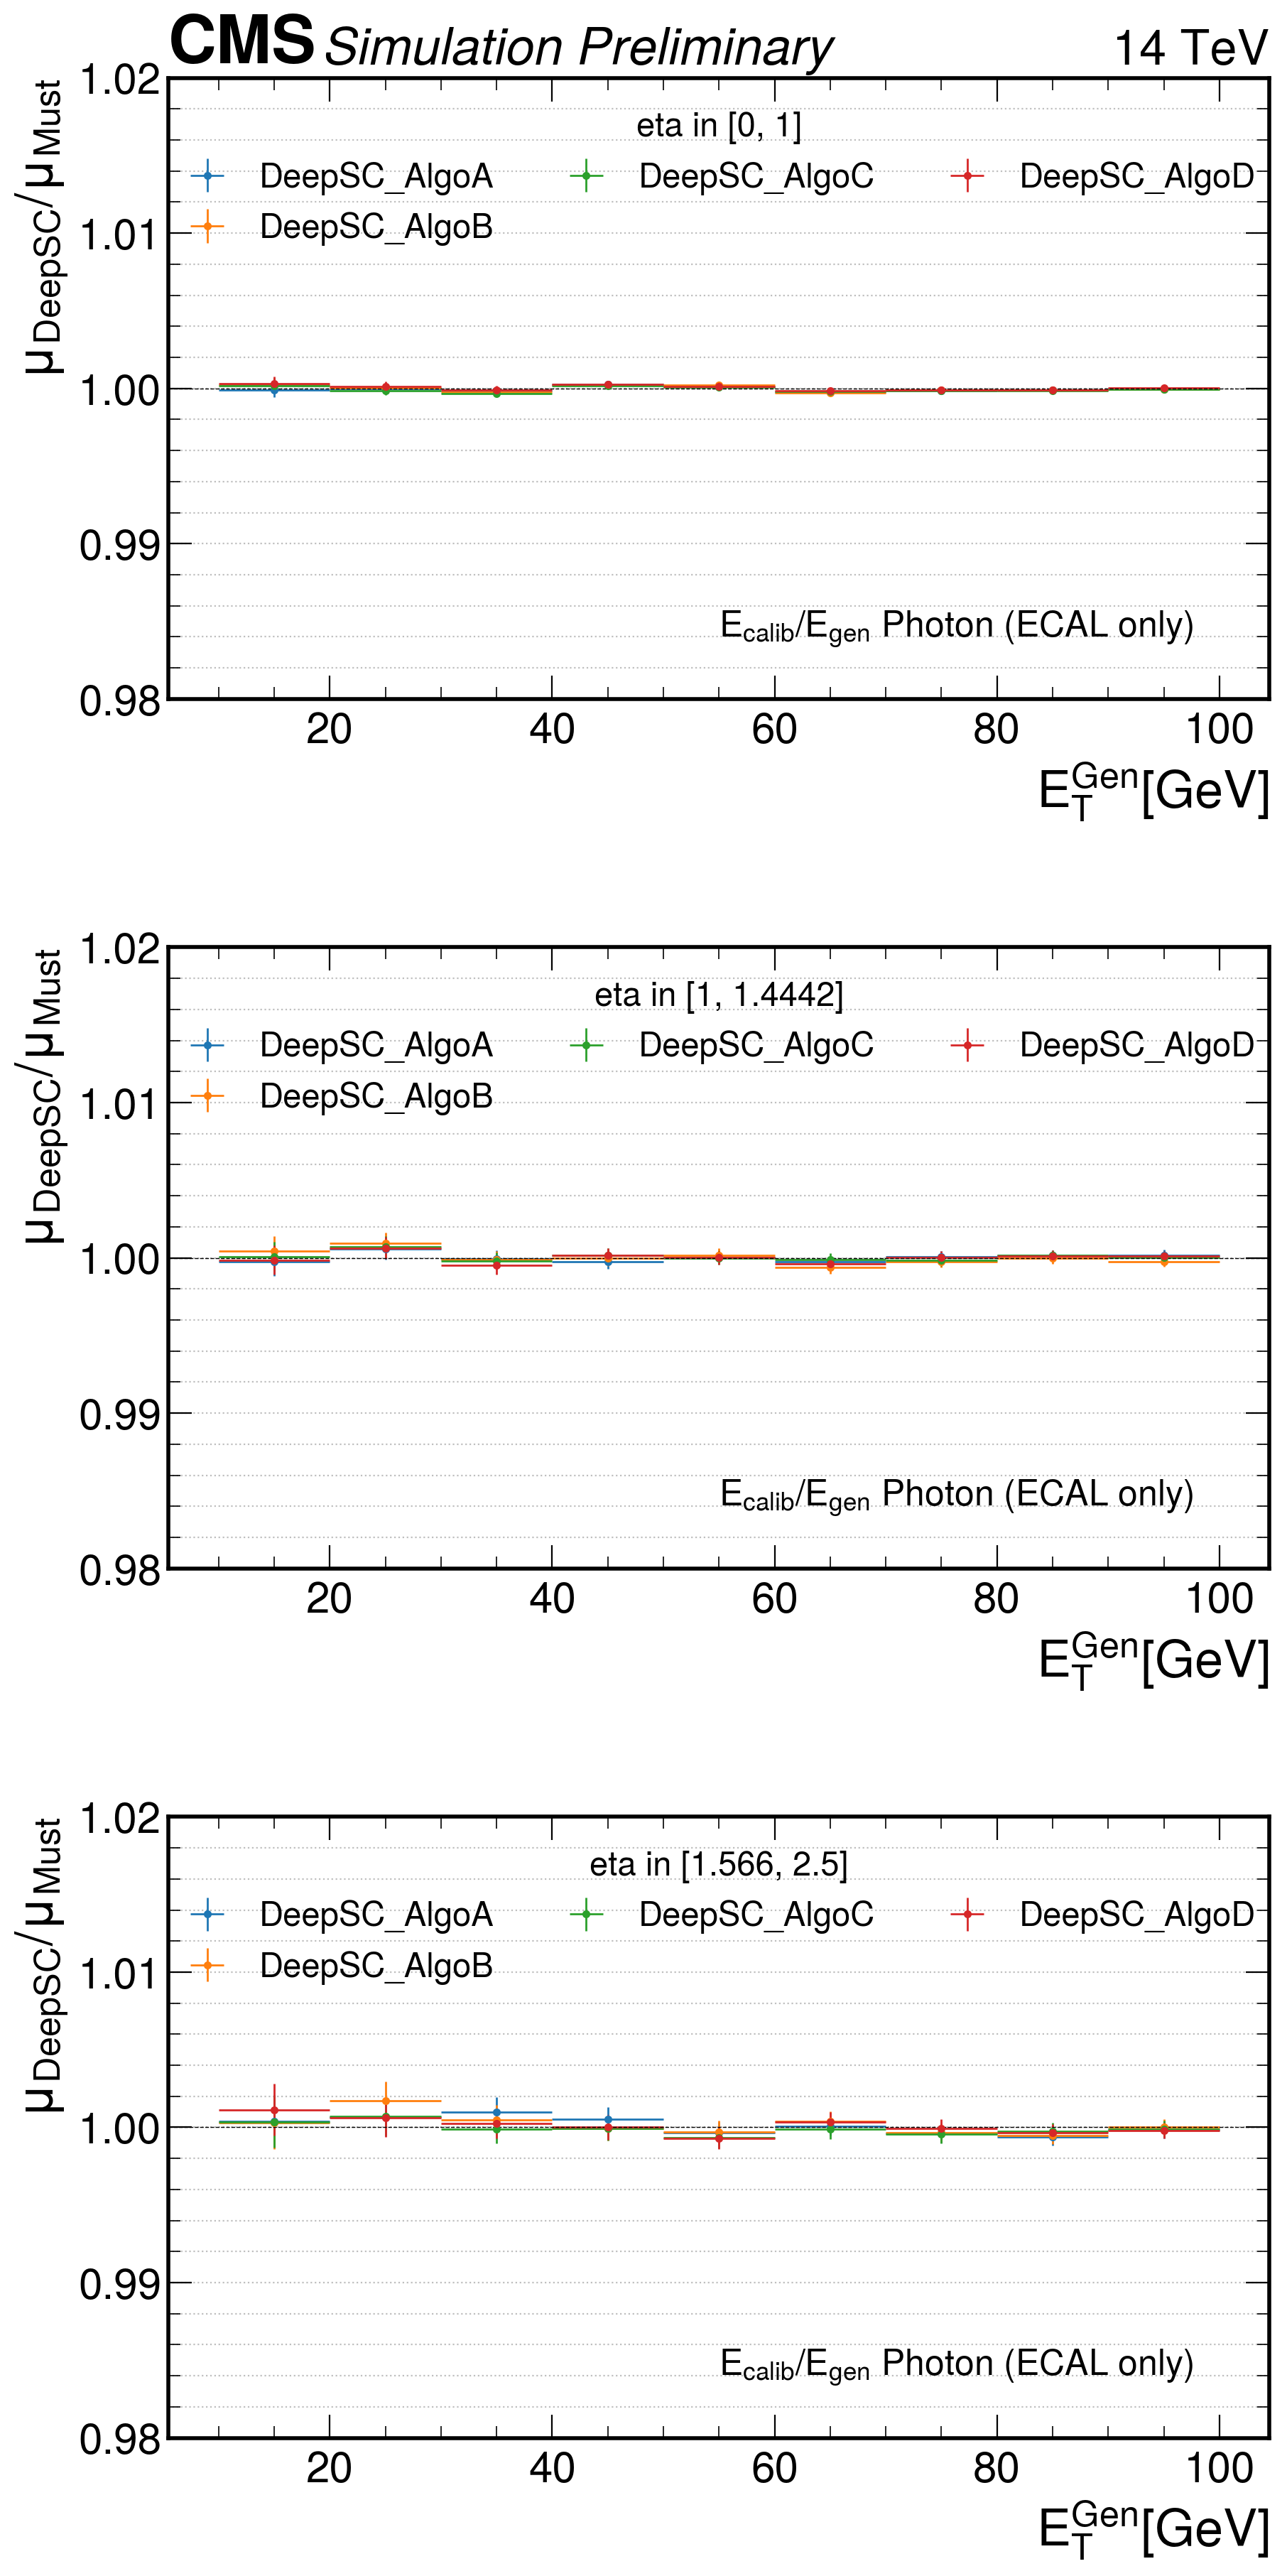

In [22]:
do_summary_plot(panels_bias_byEt, [(0.98, 1.02), (0.98, 1.02), (0.98, 1.02)], name="bias", output=output_folder)

In [23]:
panels_res_byPU = [
         {
        "file1": output_folder_A+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
        "file2": output_folder_A+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_mustache.csv',
        "file3": output_folder_B+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
        "file4": output_folder_C+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
        "file5": output_folder_D+'/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
        "bins1":[50,55,60,65,70,75],
        "bins2":[0, 1, 1.4442, 1.566, 2.5], 
        #"bins2": eta_range,
        "binCol1": "pu_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Photon (ECAL only)", 
        "xlabel":"$PU$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Must}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": f"$|\eta_{{Gen}}|",
    },
    
]

In [24]:
panels_bias_byPU = panels_res_byPU[:]
for p in panels_bias_byPU :
    p['yvar'] = "m"
    p['yvar_err'] = "m_err"
    p["ylabel"] ="$\mu_{DeepSC}/\mu_{Must}$"
    
panels_bias_byPU[0]["fill_between_y"] = [0.9, 1.05]
panels_bias_byPU

[{'file1': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoA/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
  'file2': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoA/resolution_pho_SC_genmatched_byPU_eta_cruiff_mustache.csv',
  'file3': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoB/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
  'file4': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoC/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv',
  'file5': '/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/photons/SC_photons_DeepSC_AlgoD/resolution_pho_SC_genmatched_byPU_eta_cruiff_deepsc.csv'

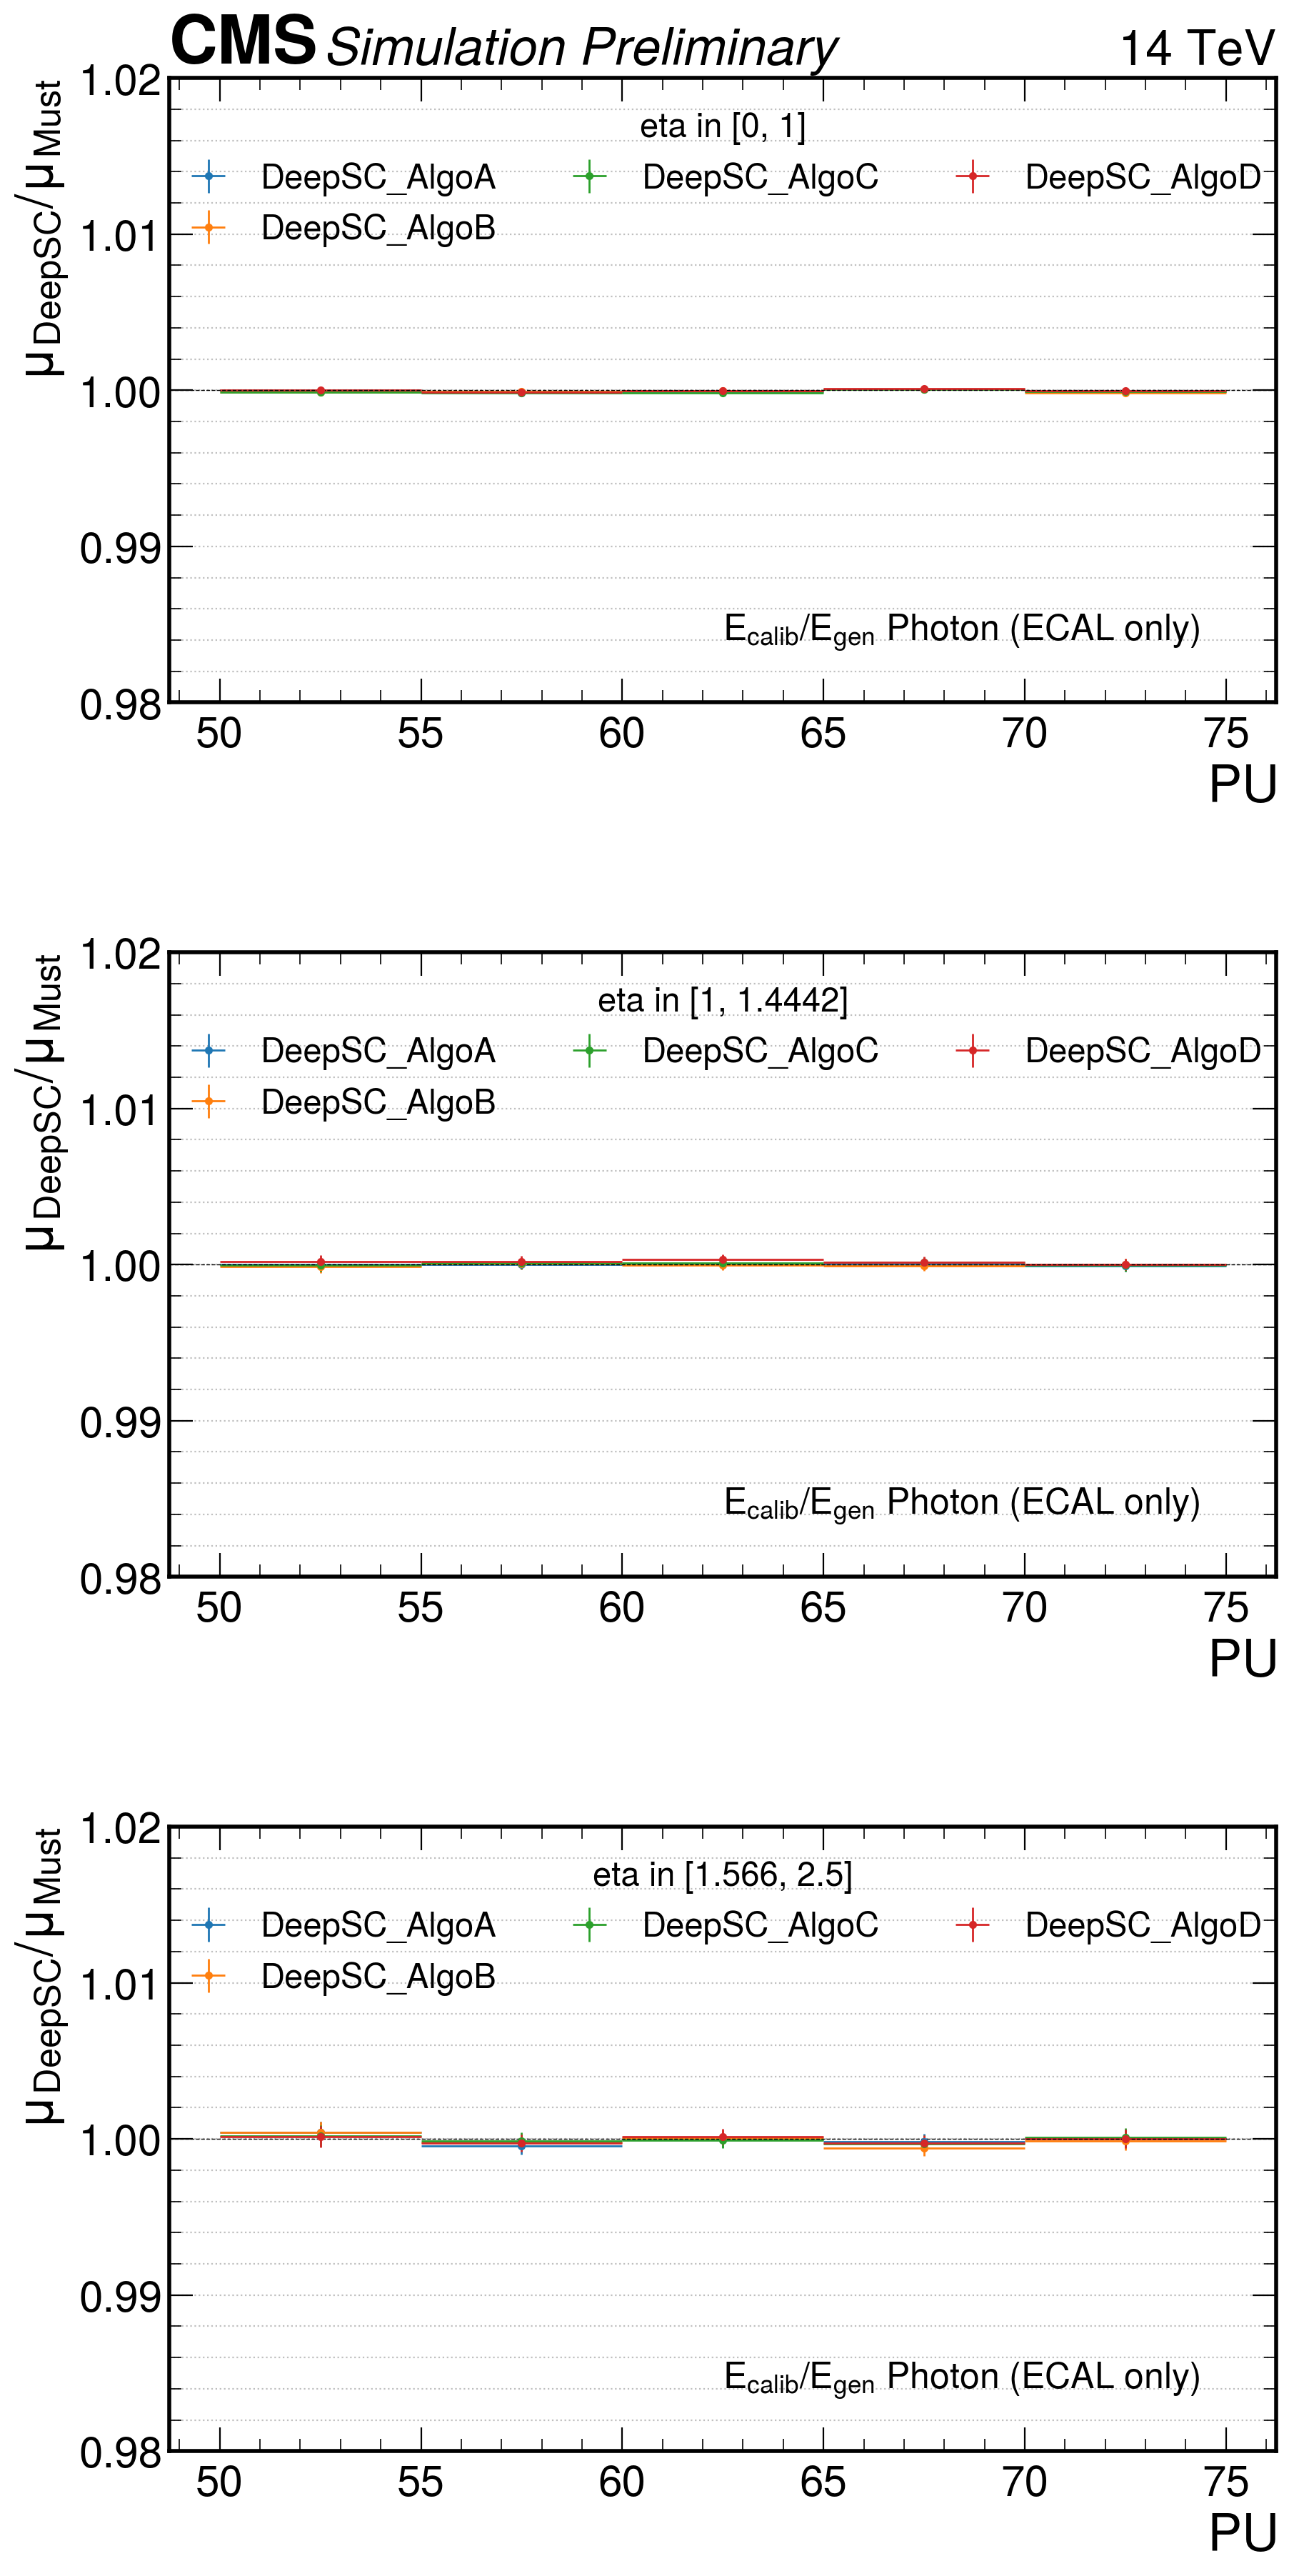

In [25]:
do_summary_plot(panels_bias_byPU, [(0.98, 1.02), (0.98, 1.02), (0.98, 1.02)], name="bias", output=output_folder)